In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # importing the libraries we will be using in this analysis 

In [2]:
df = pd.read_csv("Traffic.csv") # reading a csv file using pandas

In [3]:
df.head() # displaying the first five rows of the dataset

,Unnamed: 0,year,day,limit,y
0,1,1961,1,no,9
1,2,1961,2,no,11
2,3,1961,3,no,9
3,4,1961,4,no,20
4,5,1961,5,no,31


In [4]:
df.tail() # displaying the last five rows of the dataset 

,Unnamed: 0,year,day,limit,y
179,180,1962,88,yes,16
180,181,1962,89,yes,25
181,182,1962,90,yes,14
182,183,1962,91,yes,15
183,184,1962,92,yes,9


In [5]:
df.shape # using the shape attribute to display the number of rows and columns

(184, 5)

In [6]:
list(df.columns) # using the columns attribute to display the column names in the dataset, the list function organises it in a list format

['Unnamed: 0', 'year', 'day', 'limit', 'y']

In [7]:
df.info() # using the info attribute to diplay the total number of non-null values, and the datatype of the columns in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  184 non-null    int64 
 1   year        184 non-null    int64 
 2   day         184 non-null    int64 
 3   limit       184 non-null    object
 4   y           184 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.3+ KB


In [8]:
df.describe() # using the describe attribute to display the statistical properties of the columns in the dataset

,Unnamed: 0,year,day,y
count,184.000000,184.000000,184.000000,184.000000
mean,92.500000,1961.500000,46.500000,21.548913
std,53.260367,0.501364,26.629003,8.786341
min,1.000000,1961.000000,1.000000,7.000000
25%,46.750000,1961.000000,23.750000,15.000000
50%,92.500000,1961.500000,46.500000,20.000000
75%,138.250000,1962.000000,69.250000,26.000000
max,184.000000,1962.000000,92.000000,49.000000


# Data cleaning

In [9]:
df.isnull().sum() # using the isnull attribute to check for the missing values in each column of the dataset  

Unnamed: 0    0
year          0
day           0
limit         0
y             0
dtype: int64

In [10]:
df_subset = df.drop('Unnamed: 0',1) # we will be dropping the "Unnamed:0" column since it is a repetition of the index column 
df_subset.head() # We then print the first five rows of the dataset to show that the "Unnamed: 0" column has been dropped

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_14056\2887512237.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_subset = df.drop('Unnamed: 0',1) # we will be dropping the "Unnamed:0" column since it is a repetition of the index column


,year,day,limit,y
0,1961,1,no,9
1,1961,2,no,11
2,1961,3,no,9
3,1961,4,no,20
4,1961,5,no,31


In [11]:
df_subset.rename(columns={"y": "accident_count", "limit": "speed_limit"}, inplace=True) # Changing the column names to more descriptive names
df_subset.head()

,year,day,speed_limit,accident_count
0,1961,1,no,9
1,1961,2,no,11
2,1961,3,no,9
3,1961,4,no,20
4,1961,5,no,31


In [12]:
df_subset["speed_limit"] = df_subset["speed_limit"].astype("category")

In [13]:
df_subset.info() # the datatype of the speed_limit column has been changed to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            184 non-null    int64   
 1   day             184 non-null    int64   
 2   speed_limit     184 non-null    category
 3   accident_count  184 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 4.7 KB


In [14]:
df_subset.duplicated().sum() # checking for duplicated values in the dataset

0

In [15]:
# summary table
pd.crosstab(df_subset.speed_limit, df_subset.accident_count) # cross tabulating between the speed_limit and accident_count columns to give a contigency table

accident_count,7,8,9,10,11,12,13,14,15,16,...,37,38,39,40,41,42,44,47,48,49
speed_limit,,,,,,,,,,,,,,,,,,,,,
no,0,2,3,1,2,2,1,6,7,4,...,2,1,2,2,0,1,1,1,1,1
yes,1,0,5,1,2,5,3,2,6,6,...,0,0,0,0,2,1,0,0,0,0


# Exploratory data analysis

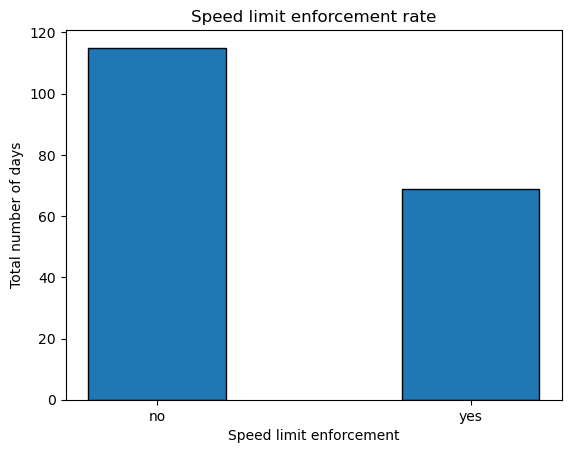

In [16]:
width = 0.35 # specifying the width of each bar
x = (0,0.8) # specifying the position of the two bars on the x-axis

enforcement_count = df_subset["speed_limit"].value_counts()
plt.bar(x, enforcement_count, width, edgecolor="black")
plt.xticks(x,enforcement_count.index)
plt.title("Speed limit enforcement rate")
plt.xlabel("Speed limit enforcement")
plt.ylabel("Total number of days")
plt.show()

In [17]:
df_subset["speed_limit"].value_counts()

no     115
yes     69
Name: speed_limit, dtype: int64

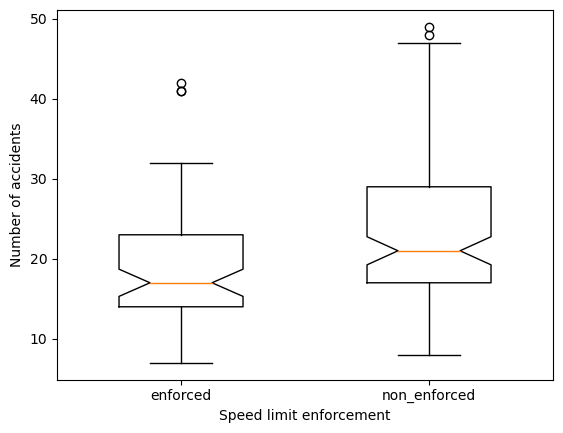

In [18]:
enforced = df_subset[df_subset["speed_limit"]=="yes"]
non_enforced = df_subset[df_subset["speed_limit"]=="no"]
plt.boxplot([enforced.accident_count, non_enforced.accident_count], notch =True, widths =(0.5,0.5))
plt.xlabel("Speed limit enforcement")
plt.ylabel("Number of accidents")
plt.xticks([1,2],["enforced","non_enforced"])
plt.show()  # the little circles represent outliers

In [19]:
# Accident frequency

enforced_speed = df_subset[df_subset["speed_limit"]== "yes"]
non_enforced_speed = df_subset[df_subset["speed_limit"]== "no"]

count_enforced = enforced_speed["accident_count"].sum()
count_non_enforced = non_enforced_speed["accident_count"].sum()

print("Accident Frequency:")
print("Enforced speed limit accidents:", count_enforced)
print("Non enforced speed limit accidents:", count_non_enforced)

Accident Frequency:
Enforced speed limit accidents: 1305
Non enforced speed limit accidents: 2660


In [20]:
# Average accidents

average_accidents_enforced = enforced_speed["accident_count"].mean()
average_accidents_non_enforced = non_enforced_speed["accident_count"].mean()

print("Average Accidents in a day:")
print("Average Accidents on speed limit enforced days:", average_accidents_enforced)
print("Average Accidents on non-enforced speed limit days:", average_accidents_non_enforced)

Average Accidents in a day:
Average Accidents on speed limit enforced days: 18.91304347826087
Average Accidents on non-enforced speed limit days: 23.130434782608695


In [21]:
# Accident rate comparison
total_days_enforced = enforced_speed.shape[0]
total_days_non_enforced = non_enforced_speed.shape[0]

accident_rate_enforced = count_enforced / total_days_enforced
accident_rate_non_enforced = count_non_enforced/ total_days_non_enforced

print("Accident rate comparison:")
print("Accident rate for enforced speed limit:", accident_rate_enforced)
print("Accident rate for non enforced speed limit:", accident_rate_non_enforced)

Accident rate comparison:
Accident rate for enforced speed limit: 18.91304347826087
Accident rate for non enforced speed limit: 23.130434782608695


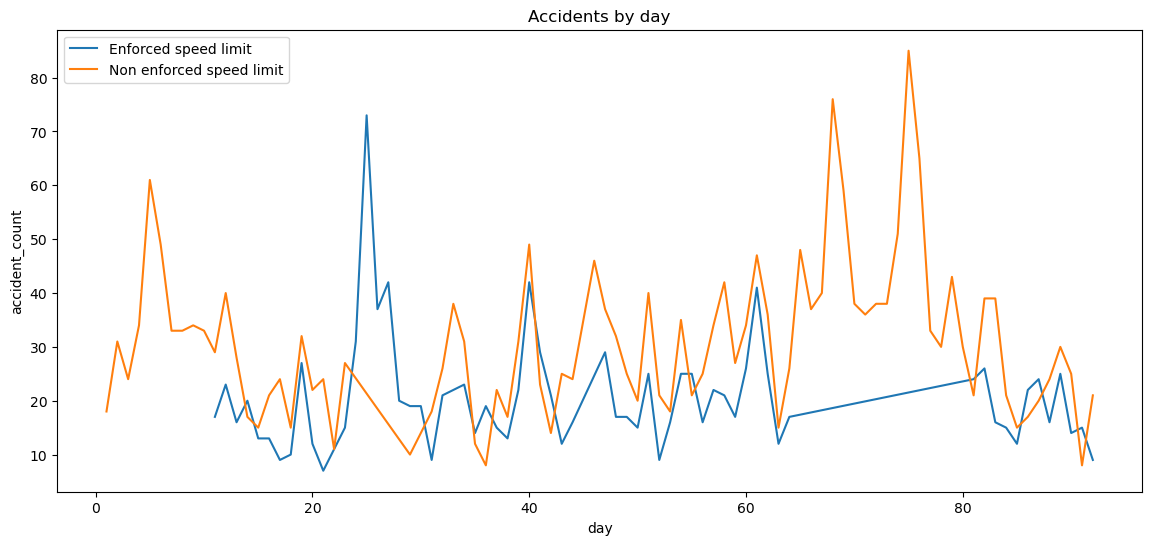

In [22]:
# Time series analysis
accidents_by_day_enforced = enforced_speed.groupby("day").sum()
accidents_by_day_non_enforced = non_enforced_speed.groupby("day").sum()

plt.figure(figsize=(14,6))
plt.plot(accidents_by_day_enforced.index, accidents_by_day_enforced["accident_count"], label= "Enforced speed limit")
plt.plot(accidents_by_day_non_enforced.index, accidents_by_day_non_enforced["accident_count"], label= "Non enforced speed limit")
plt.xlabel("day")
plt.ylabel("accident_count")
plt.title("Accidents by day")
plt.legend()
plt.show()

In [23]:
# statistical significance
t_statistic, p_value =ttest_ind(enforced_speed["accident_count"], non_enforced_speed["accident_count"])

print("\nStatistical significance:")
print("T-Statistics:", t_statistic)
print("p-Value:", p_value)


Statistical significance:
T-Statistics: -3.2324546250545945
p-Value: 0.001457100349629465
